In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('popular')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    | 

True

In [ ]:
df = pd.read_csv('dataset_cgv_fix1.csv')

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629 entries, 0 to 6628
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nama      6629 non-null   object
 1   tanggal   6629 non-null   object
 2   rating    6629 non-null   object
 3   komentar  6629 non-null   object
dtypes: object(4)
memory usage: 207.3+ KB
None
                    nama       tanggal  \
0                Anugrah  9 April 2025   
1         Kurniawan Dody  7 April 2025   
2             Aris Manto  7 April 2025   
3             GATOT KACA  7 April 2025   
4  cheppi rangga casmita  6 April 2025   

                                   rating  \
0  Diberi rating 5 bintang dari 5 bintang   
1  Diberi rating 5 bintang dari 5 bintang   
2  Diberi rating 1 bintang dari 5 bintang   
3  Diberi rating 1 bintang dari 5 bintang   
4  Diberi rating 5 bintang dari 5 bintang   

                                            komentar  
0                              rating 5 

In [ ]:

def create_dict_norm():
    normalization_words = pd.read_csv('normalisasi.csv', names=['singkat', 'normal'], encoding='latin-1')
    normalization_words_dict = dict(zip(normalization_words['singkat'], normalization_words['normal']))
    return normalization_words_dict

def create_dict_stopword():
    with open('stopwords_id.txt', 'r') as file:
        stop_words = [line.strip() for line in file]
    return stop_words

def case_folding(text):
    return text.lower()

def clean_text(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def tokenize(text):
    return word_tokenize(text)

def normalize(tokens, normalization_dict):
    return [normalization_dict.get(token, token) for token in tokens]

def filter_stopwords(tokens, stop_words):
    return [word for word in tokens if word not in stop_words]

def stemming(tokens):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return [stemmer.stem(token) for token in tokens]


def replaceThreeOrMore(Review):
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", Review)

def preprocess_review(Review, normalization_dict, stop_words):
    Review = case_folding(Review)
    Review = clean_text(Review)
    tokens = tokenize(Review)
    normalized_tokens = normalize(tokens, normalization_dict)
    filtered_tokens = filter_stopwords(normalized_tokens, stop_words)
    stemmed_tokens = stemming(filtered_tokens)
    return ' '.join(stemmed_tokens)

def main():
    df['komentar']

    normalization_dict = create_dict_norm()
    stop_words = create_dict_stopword()

    df['processed_komentar'] = df['komentar'].apply(lambda x: preprocess_review(str(x), normalization_dict, stop_words))

    print("Preprocessing selesai!")
    print("\nHasil preprocessing:")
    print(df[['komentar', 'processed_komentar']])

if __name__ == "__main__":
    main()

Preprocessing selesai!

Hasil preprocessing:
                                               komentar  \
0                                 rating 5 free popcorn   
1     keren banget mudah ga antri lebih semangat bua...   
2        apk gak jelas mau buat paspor aja ribet banget   
3                                                 jelek   
4                                                  good   
...                                                 ...   
6624                         Iso ndelok schedule pilem.   
6625                          Bagus sekali! Membantu :)   
6626          Wah keren kabisa nonton apasja diman saja   
6627                                     Berguna banget   
6628     Yang suka nonton film wajib punya Aplikasi ini   

                                     processed_komentar  
0                                   rating free popcorn  
1     keren banget mudah ga antri semangat nonton da...  
2                       apk gak paspor aja ribet banget  
3             

In [ ]:
df.to_csv('clean_dataulasan.csv', index=False)

In [ ]:
df = df.dropna(subset=['processed_komentar'])

In [ ]:
df.to_csv('clean_review.csv', index=False)

In [ ]:
!pip install lexicon

In [ ]:
from lexicon import Lexicon

# Kamus Positive
lexicon_positive = pd.read_excel('kamus_positive.xlsx')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

# Kamus Negative
lexicon_negative = pd.read_excel('kamus_negative.xlsx')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

# Analisis Sentimen
def sentiment_analysis_lexicon_indonesia(text):
    if not isinstance(text, str):
        return 0, 'Netral'

    score = 0
    for word in text.split():
        if word in lexicon_positive_dict:
            score += lexicon_positive_dict[word]
    for word in text.split():
        if word in lexicon_negative_dict:
            score += lexicon_negative_dict[word]

    sentimen = ''
    if score > 0:
        sentimen = 'Positif'
    elif score < 0:
        sentimen = 'Negatif'
    else:
        sentimen = 'Netral'
    return score, sentimen

def main():
    # Memuat dataset
    df = pd.read_csv('clean_review1.csv')

    if 'processed_komentar' in df.columns:
        # Mengaplikasikan analisis sentimen
        results = df['processed_komentar'].apply(sentiment_analysis_lexicon_indonesia)
        results = list(zip(*results))
        df['Polarity Score'] = results[0]
        df['Sentimen'] = results[1]

        # Simpan Hasil
        df.to_csv('sentimen_review.csv', index=False)

        print(df[['processed_komentar', 'Polarity Score', 'Sentimen']])
    else:
        print("Kolom 'processed_komentar' tidak ditemukan dalam DataFrame.")

if __name__ == "__main__":
    main()



<ipython-input-10-f29619833b71>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in lexicon_positive_dict:
<ipython-input-10-f29619833b71>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lexicon_positive_dict[row[0]] = row[1]
<ipython-input-10-f29619833b71>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in lexicon_negative_dict:
<ipython-input-10-f29619833b71>:15: FutureWarning: Series.__getitem__ tre

                                     processed_komentar  Polarity Score  \
0                                   rating free popcorn               3   
1     keren banget mudah ga antri semangat nonton da...              12   
2                       apk gak paspor aja ribet banget              -4   
3                                                 jelek              -5   
4                                                  good               5   
...                                                 ...             ...   
6477                          iso ndelok schedule pilem               0   
6478                                        bagus bantu              -3   
6479                     keren kabisa nonton apasja dim               0   
6480                                        guna banget               0   
6481                    suka nonton film wajib aplikasi              -4   

     Sentimen  
0     Positif  
1     Positif  
2     Negatif  
3     Negatif  
4     Positif  
...

In [ ]:
import pandas as pd
import re
from lexicon import Lexicon

# Kamus Positive
lexicon_positive = pd.read_excel('kamus_positive.xlsx')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

# Kamus Negative
lexicon_negative = pd.read_excel('kamus_negative.xlsx')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

aspect_keywords = {
    'UI/UX': ['tampilan', 'interface', 'desain', 'navigasi', 'user', 'layout'],
    'Pembayaran': ['bayar', 'pembayaran', 'e-wallet', 'dana', 'ovo', 'gopay', 'transaksi'],
    'Promo': ['promo', 'diskon', 'potongan', 'voucher', 'kupon'],
    'Pemesanan': ['pesan', 'booking', 'kursi', 'tiket'],
    'Layanan': ['cs', 'layanan', 'customer', 'respon', 'bantuan', 'komplain']
}

def aspect_sentiment_analysis(text, lexicon_pos, lexicon_neg, aspects_dict):
    aspect_sentiments = {}
    tokens = text.split()

    for aspect, keywords in aspects_dict.items():
        if any(keyword in tokens for keyword in keywords):
            score = 0
            for word in tokens:
                if word in lexicon_pos:
                    score += lexicon_pos[word]
                elif word in lexicon_neg:
                    score += lexicon_neg[word]

            if score > 0:
                label = 'Positif'
            elif score < 0:
                label = 'Negatif'
            else:
                label = 'Netral'

            aspect_sentiments[aspect] = {'score': score, 'sentiment': label}

    return aspect_sentiments


def sentiment_analysis_lexicon_indonesia(text):
    if not isinstance(text, str):
        return 0, 'Netral'
    score = 0
    for word in text.split():
        if word in lexicon_positive_dict:
            score += lexicon_positive_dict[word]
    for word in text.split():
        if word in lexicon_negative_dict:
            score += lexicon_negative_dict[word]

    sentimen = ''
    if score > 0:
        sentimen = 'Positif'
    elif score < 0:
        sentimen = 'Negatif'
    else:
        sentimen = 'Netral'
    return score, sentimen


def main():
    # Memuat dataset
    df = pd.read_csv('clean_review1.csv')

    results = df['processed_komentar'].apply(sentiment_analysis_lexicon_indonesia)
    results = list(zip(*results))
    df['Polarity Score'] = results[0]
    df['Sentimen'] = results[1]

    # ABSA: Analisis berdasarkan aspek
    df['Aspect_Sentiment'] = df['processed_komentar'].apply(
        lambda x: aspect_sentiment_analysis(x, lexicon_positive_dict, lexicon_negative_dict, aspect_keywords)
    )

    # Simpan hasil
    df.to_csv('sentimen_absa.csv', index=False)

    # Tampilkan hasil
    print(df[['processed_komentar', 'Polarity Score', 'Sentimen', 'Aspect_Sentiment']].head())

if __name__ == "__main__":
    main()


<ipython-input-2-f8c8354848c5>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in lexicon_positive_dict:
<ipython-input-2-f8c8354848c5>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lexicon_positive_dict[row[0]] = row[1]
<ipython-input-2-f8c8354848c5>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in lexicon_negative_dict:
<ipython-input-2-f8c8354848c5>:18: FutureWarning: Series.__getitem__ treat

                                  processed_komentar  Polarity Score Sentimen  \
0                                rating free popcorn               3  Positif   
1  keren banget mudah ga antri semangat nonton da...              12  Positif   
2                    apk gak paspor aja ribet banget              -4  Negatif   
3                                              jelek              -5  Negatif   
4                                               good               5  Positif   

  Aspect_Sentiment  
0               {}  
1               {}  
2               {}  
3               {}  
4               {}  


Naive Bayes Classification Report:
              precision    recall  f1-score   support

     Negatif       0.68      0.94      0.79       584
      Netral       0.87      0.31      0.46       261
     Positif       0.88      0.76      0.82       452

    accuracy                           0.75      1297
   macro avg       0.81      0.67      0.69      1297
weighted avg       0.79      0.75      0.73      1297

Akurasi Model: 0.7517


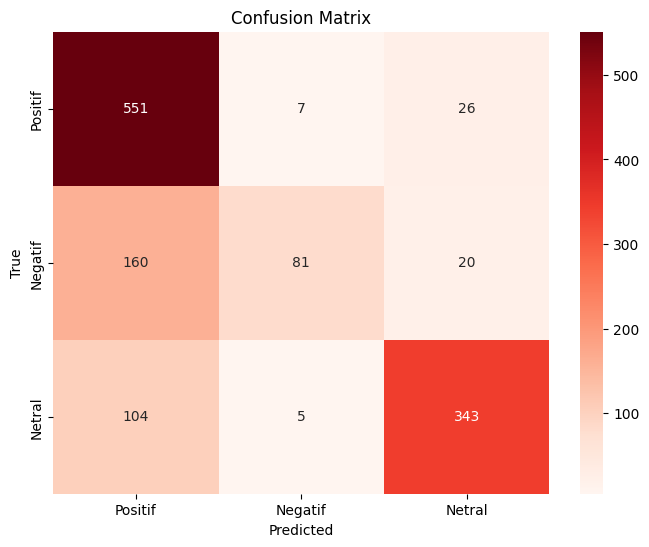

In [ ]:
  import pandas as pd
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.model_selection import train_test_split
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
  import matplotlib.pyplot as plt
  import seaborn as sns

  df = pd.read_csv('sentimen_review.csv')

  df = df.dropna(subset=['processed_komentar'])

  X = df['processed_komentar']
  y = df['Sentimen']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.95)
  X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
  X_test_tfidf = tfidf_vectorizer.transform(X_test)

  nb_model = MultinomialNB(alpha=0.5)
  nb_model.fit(X_train_tfidf, y_train)
  y_pred = nb_model.predict(X_test_tfidf)

  print("Naive Bayes Classification Report:")
  print(classification_report(y_test, y_pred))

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Akurasi Model: {accuracy:.4f}")

  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=df['Sentimen'].unique(), yticklabels=df['Sentimen'].unique())
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()


In [ ]:
len(tfidf_vectorizer.vocabulary_)


4574

=== SVM Classification Report ===
              precision    recall  f1-score   support

     Negatif       0.89      0.91      0.90       584
      Netral       0.79      0.80      0.80       261
     Positif       0.92      0.89      0.91       452

    accuracy                           0.88      1297
   macro avg       0.87      0.87      0.87      1297
weighted avg       0.88      0.88      0.88      1297

Akurasi Model SVM: 0.8813


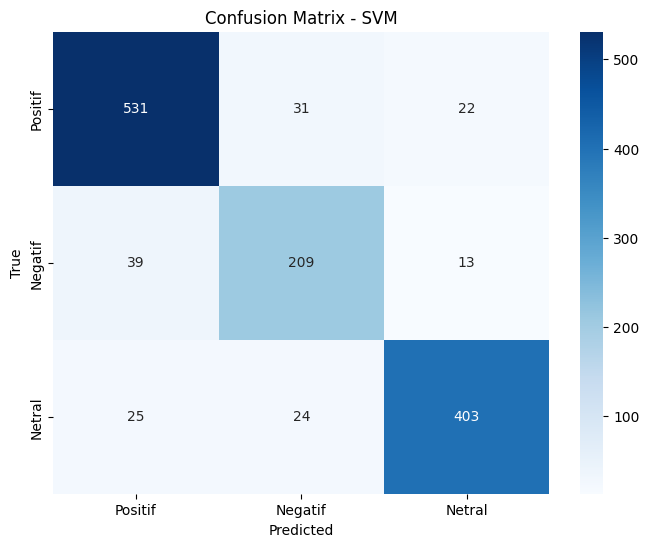

In [ ]:
from sklearn.svm import LinearSVC

# Inisialisasi dan latih model SVM
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluasi model SVM
print("=== SVM Classification Report ===")
print(classification_report(y_test, y_pred_svm))

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi Model SVM: {accuracy_svm:.4f}")

# Confusion matrix SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Sentimen'].unique(), yticklabels=df['Sentimen'].unique())
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

     Negatif       0.84      0.92      0.88       584
      Netral       0.80      0.82      0.81       261
     Positif       0.92      0.80      0.86       452

    accuracy                           0.86      1297
   macro avg       0.85      0.85      0.85      1297
weighted avg       0.86      0.86      0.86      1297

Akurasi Model Random Forest: 0.8574


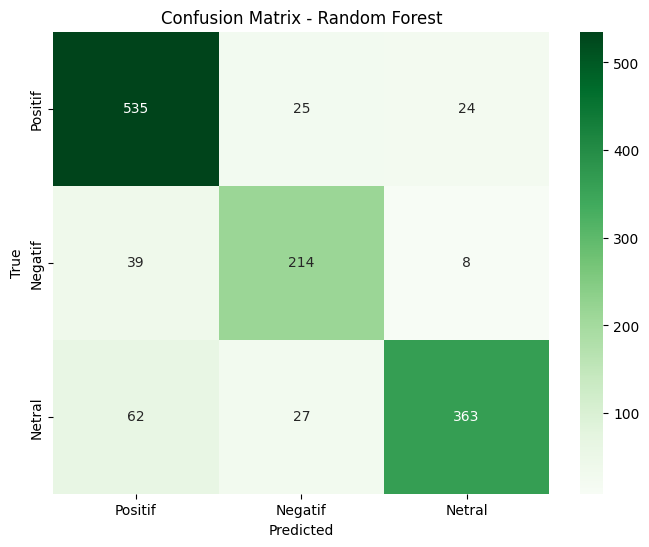

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluasi model Random Forest
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Model Random Forest: {accuracy_rf:.4f}")

# Confusion matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=df['Sentimen'].unique(), yticklabels=df['Sentimen'].unique())
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
sentiment_counts = y.value_counts()
print(sentiment_counts)

Sentimen
Negatif    2916
Positif    2260
Netral     1306
Name: count, dtype: int64


In [ ]:
import joblib

joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

<ipython-input-7-aa90363333e1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sentimen_counts.values, x=sentimen_counts.index, palette='pastel')


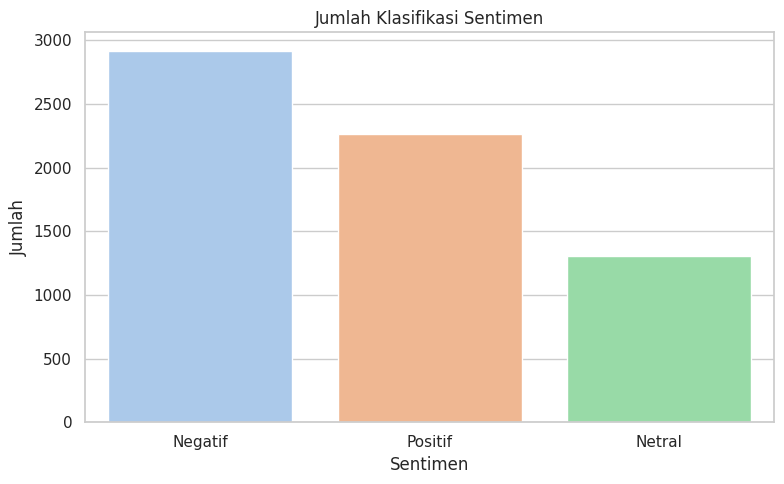

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sentimen_review.csv')

sentimen_counts = df['Sentimen'].value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(y=sentimen_counts.values, x=sentimen_counts.index, palette='pastel')

plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Jumlah Klasifikasi Sentimen')
plt.tight_layout()
plt.show()


<ipython-input-10-7fc26691fb97>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[acc * 100 for acc in accuracies], y=model_names, palette='muted')


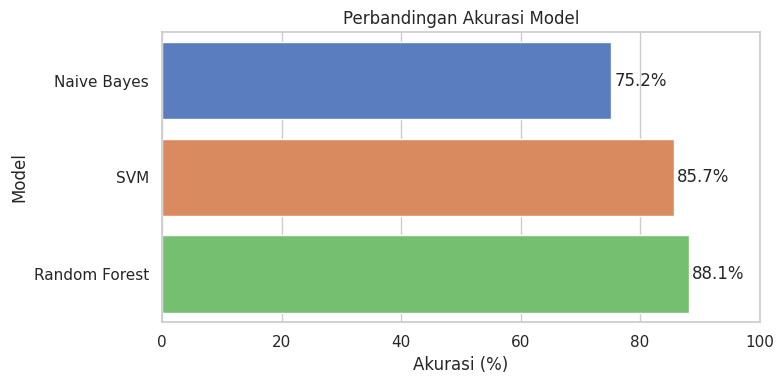

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data model dan akurasi
model_names = ['Naive Bayes', 'SVM', 'Random Forest']
accuracies = [0.7517, 0.8574, 0.8813]  # tetap dalam desimal

# Atur gaya seaborn
sns.set(style="whitegrid")

# Buat figure
plt.figure(figsize=(8, 4))
sns.barplot(x=[acc * 100 for acc in accuracies], y=model_names, palette='muted')

# Tambahkan label di ujung bar (dalam %)
for i, acc in enumerate(accuracies):
    plt.text(acc * 100 + 0.5, i, f"{acc * 100:.1f}%", va='center')

# Label dan judul
plt.xlabel('Akurasi (%)')
plt.ylabel('Model')
plt.title('Perbandingan Akurasi Model')
plt.xlim(0, 100)  # karena dalam persen
plt.tight_layout()
plt.show()


<ipython-input-1-cefa149f5d0e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=[acc * 100 for acc in accuracies], palette='muted')


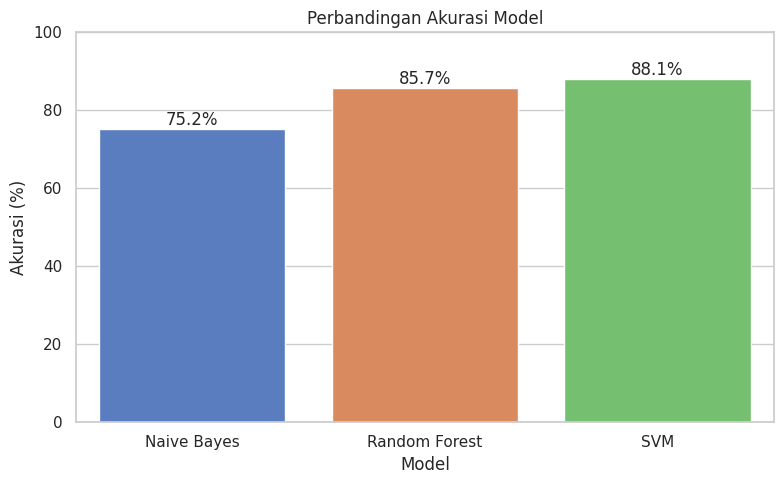

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['Naive Bayes', 'Random Forest', 'SVM']
accuracies = [0.7517, 0.8574, 0.8813]

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=[acc * 100 for acc in accuracies], palette='muted')

for i, acc in enumerate(accuracies):
    plt.text(i, acc * 100 + 1, f"{acc * 100:.1f}%", ha='center')

plt.ylabel('Akurasi (%)')
plt.xlabel('Model')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('popular')
nltk.download('punkt_tab')
# Tahap-tahap preprocessing seperti sebelumnya...

def create_dict_norm():
    normalization_words = pd.read_csv('normalisasi.csv', names=['singkat', 'normal'], encoding='latin-1')
    return dict(zip(normalization_words['singkat'], normalization_words['normal']))

def create_dict_stopword():
    with open('stopwords_id.txt', 'r') as file:
        return [line.strip() for line in file]

def case_folding(text):
    return text.lower()

def clean_text(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def replaceThreeOrMore(text):
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", text)

def tokenize(text):
    return word_tokenize(text)

def normalize(tokens, normalization_dict):
    return [normalization_dict.get(token, token) for token in tokens]

def filter_stopwords(tokens, stop_words):
    return [word for word in tokens if word not in stop_words]

def stemming(tokens):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return [stemmer.stem(token) for token in tokens]

def preprocess_step_by_step(text, normalization_dict, stop_words):
    print("Teks asli:")
    print(text)
    print("-" * 50)

    # Exaggeration handling
    text = replaceThreeOrMore(text)
    print("Setelah replaceThreeOrMore:")
    print(text)
    print("-" * 50)

    # Case folding
    text_cf = case_folding(text)
    print("Setelah case folding:")
    print(text_cf)
    print("-" * 50)

    # Cleaning
    text_clean = clean_text(text_cf)
    print("Setelah clean_text:")
    print(text_clean)
    print("-" * 50)

    # Tokenization
    tokens = tokenize(text_clean)
    print("Setelah tokenisasi:")
    print(tokens)
    print("-" * 50)

    # Normalisasi
    normalized = normalize(tokens, normalization_dict)
    print("Setelah normalisasi:")
    print(normalized)
    print("-" * 50)

    # Stopword removal
    filtered = filter_stopwords(normalized, stop_words)
    print("Setelah filtering stopwords:")
    print(filtered)
    print("-" * 50)

    # Stemming
    stemmed = stemming(filtered)
    print("Setelah stemming:")
    print(stemmed)
    print("-" * 50)

    # Final result
    final = ' '.join(stemmed)
    print("Hasil akhir preprocessing:")
    print(final)
    print("=" * 50)

# === Main Execution ===

if __name__ == "__main__":

    sample = "cgv cinemaa dmall depok kebetulan deket bgt dr rmh, jd effortless bgt. staff-nya ramah bgt, murah senyum, sabar dan ga pelit informasi dan pengetahuan buat aku mamak mamak yg ga bgtu ngerti. goodjob utk mba stella di cgv dmall depok 🤗 sukses terus utk cgv cinema dmall depok 💫"

    # Load resources
    normalization_dict = create_dict_norm()
    stop_words = create_dict_stopword()

    # Jalankan proses bertahap
    preprocess_step_by_step(sample, normalization_dict, stop_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    | 

Teks asli:
cgv cinemaa dmall depok kebetulan deket bgt dr rmh, jd effortless bgt. staff-nya ramah bgt, murah senyum, sabar dan ga pelit informasi dan pengetahuan buat aku mamak mamak yg ga bgtu ngerti. goodjob utk mba stella di cgv dmall depok 🤗 sukses terus utk cgv cinema dmall depok 💫
--------------------------------------------------
Setelah replaceThreeOrMore:
cgv cinemaa dmall depok kebetulan deket bgt dr rmh, jd effortless bgt. staff-nya ramah bgt, murah senyum, sabar dan ga pelit informasi dan pengetahuan buat aku mamak mamak yg ga bgtu ngerti. goodjob utk mba stella di cgv dmall depok 🤗 sukses terus utk cgv cinema dmall depok 💫
--------------------------------------------------
Setelah case folding:
cgv cinemaa dmall depok kebetulan deket bgt dr rmh, jd effortless bgt. staff-nya ramah bgt, murah senyum, sabar dan ga pelit informasi dan pengetahuan buat aku mamak mamak yg ga bgtu ngerti. goodjob utk mba stella di cgv dmall depok 🤗 sukses terus utk cgv cinema dmall depok 💫
------

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer



# Memuat dataset dari file CSV
df = pd.read_csv('sentimen_telegram_lexicon.csv')

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_komentar'])

# Hitung rata-rata skor TF-IDF per review
avg_tfidf_scores = X_tfidf.mean(axis=1)

# Tampilkan hasil
print("Review dan rata-rata TF-IDF score:\n")
for i, review in enumerate(df['processed_komentar']):
    score = avg_tfidf_scores[i, 0] * 1000
    print(f"{review}  {score:.6f}")


Review dan rata-rata TF-IDF score:

daftar aja susah banget dapet kode d telegram masuk si gimana  0.412271
aneh kali telegram kode ga kirim kirim dri telpon ga ngomong ntah nya  0.412623
ga nerima kode vpn login pakai nomor aktif kode  0.360404
good  0.134228
kode email kadaluarsa detik  0.241205
terima pesan no hp coba kemarin masu  0.339107
nice  0.134228
jelek  0.134228
sih sma telegram akun ku curi orang gimna nihh woy telegram tangung lohh tolong lohh ya moga telegram trimakasih  0.492290
telegram ga kaya telegram telegram ga adil prem  0.293188
knp kode kirim masuk no hp sdh  0.337928
telegram nih ya april coba log in ga verifikasi email udah masuk verifikasi sms ga masuk masuk tolong baik butuh banget aplikasi telegram  0.538828
bikin akun spam chat kasar kena blokir nomor ku ga ngapa ngapain buka aplikasi nya aja eggak serius aplikasi nya jelek banget  0.570090
kode sms gak masuk  0.265694
suka aplikasi gaess  0.212709
ga dapet dapet kode verifikasi  0.222552
aplikasi guna log